In [2]:
import pandas as pd

combine_df = pd.read_csv('../data/curated/combine_all.csv')

In [3]:
combine_df.columns

Index(['id', 'promoType', 'price', 'hasVideo', 'agentNames', 'brandName',
       'addressStreet', 'addressSuburb', 'addressState', 'addressPostcode',
       'addressLat', 'addressLng', 'num_bath', 'type', 'formatted', 'isRural',
       'landSize', 'Retirement', 'postcode', '2023_population',
       'ERP_2023_change_number', 'natural_2023_increase_number',
       'internal_2023_migration_number', 'overseas_2023_migration_number',
       'area_in_square_kilometers', 'estimated_2024_population', 'IEO_Score',
       'IEO_State Rank', 'IEO_State Decile', 'IEO_State Percentile',
       'IER_Usual Resident Population', 'IER_Score', 'IER_State Rank',
       'IER_State Decile', 'IER_State Percentile',
       'ERP_2023_change_percentage(%)', 'population_density_2023',
       'nearest_station', 'min_walking_distance_to_station',
       'min_distance_to_university', 'min_distance_to_shopping_mall',
       'min_distance_to_secondary_school', 'min_distance_to_primary_school',
       'min_distance_to

In [4]:
df = combine_df.copy()

# Calculate the growth rate
df['2023_growth_rate'] = df['natural_2023_increase_number'] / df['2023_population'] * 100


# Calculate the growth rate
df['2024_growth_rate'] = (df['estimated_2024_population'] - df['2023_population']) / df['2023_population'] * 100

# Assuming df is your DataFrame and you've already calculated 2024_growth_rate

# Step 1: Calculate the growth factor (1.12 + growth_rate/100)
df['2025_growth_factor'] = 1.12 + (df['2024_growth_rate'] / 100)

# Step 2: Estimate population for 2025 and 2026
df['estimated_2025_population'] = df['estimated_2024_population'] * df['2025_growth_factor']


# Step 3: Calculate growth rates for 2025 and 2026
df['2025_growth_rate'] = (df['estimated_2025_population'] - df['estimated_2024_population']) / df['estimated_2024_population'] * 100

df['2026_growth_factor'] = 0.87 + (df['2025_growth_rate'] / 100)
df['estimated_2026_population'] = df['estimated_2025_population'] * df['2026_growth_factor']
df['2026_growth_rate'] = (df['estimated_2026_population'] - df['estimated_2025_population']) / df['estimated_2025_population'] * 100


# Select only the relevant columns
result_df=df[['addressPostcode', 'addressSuburb', '2023_population', 
              'estimated_2024_population', '2024_growth_rate',
              '2025_growth_rate', '2026_growth_rate']]


result = result_df.groupby('addressSuburb').median().sort_values('2024_growth_rate', ascending=False).head(10)
# this will cause permission denied so we commment it
result.to_csv('../data/curated/growrate10.csv', index=False)
result


,addressPostcode,2023_population,estimated_2024_population,2024_growth_rate,2025_growth_rate,2026_growth_rate
addressSuburb,,,,,,
CARLTON,3053.0,21376.0,25309.0,18.399139,30.399139,17.399139
MELBOURNE,3000.0,54001.0,62187.0,15.158979,27.158979,14.158979
MANOR LAKES,3024.0,80341.0,90071.0,12.110877,24.110877,11.110877
WYNDHAM VALE,3024.0,80341.0,90071.0,12.110877,24.110877,11.110877
WEST MELBOURNE,3003.0,8724.0,9483.0,8.700138,20.700138,7.700138
FOOTSCRAY,3011.0,29532.0,31749.0,7.507111,19.507111,6.507111
DOCKLANDS,3008.0,17723.0,19052.0,7.498730,19.498730,6.498730
BOX HILL,3128.0,25286.0,26828.0,6.098236,18.098236,5.098236
BRUNSWICK,3056.0,14057.0,14900.0,5.997012,17.997012,4.997012


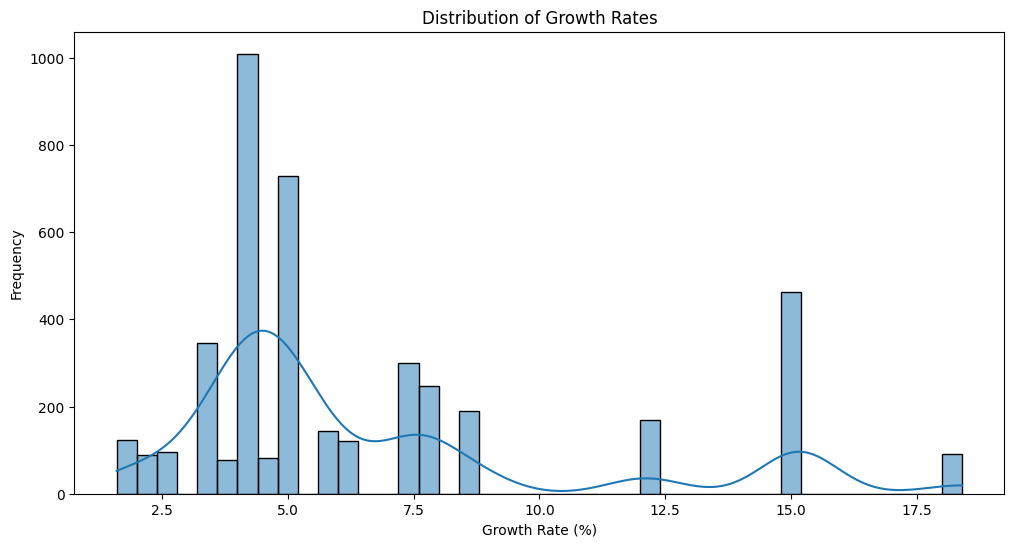

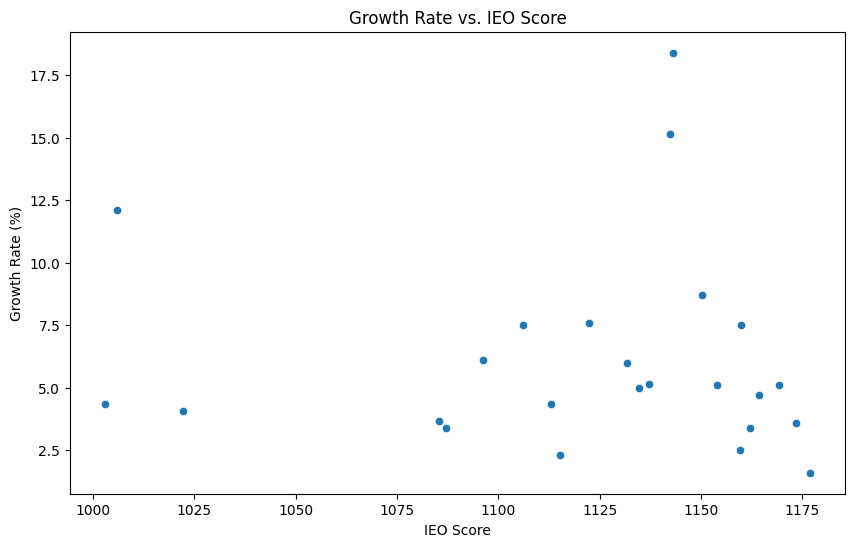

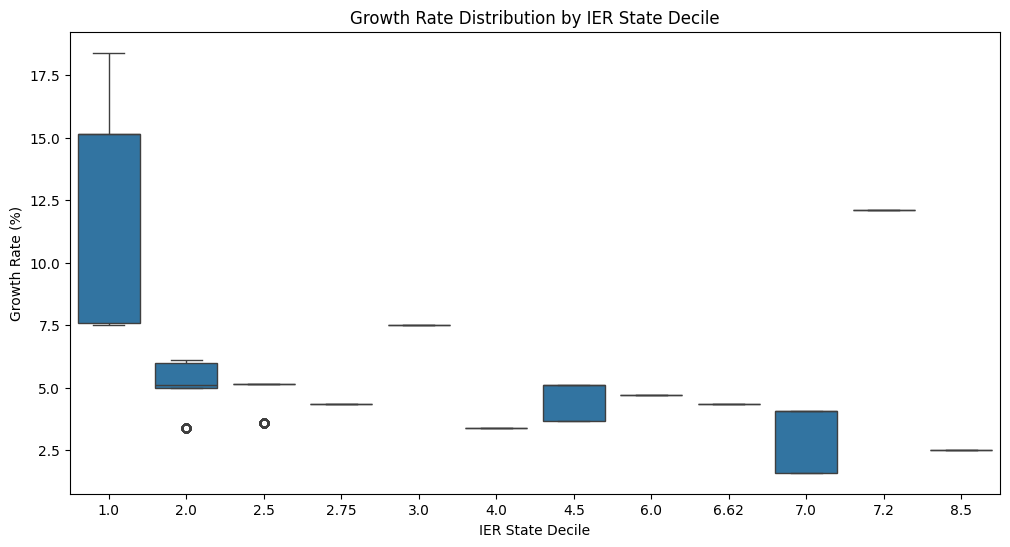

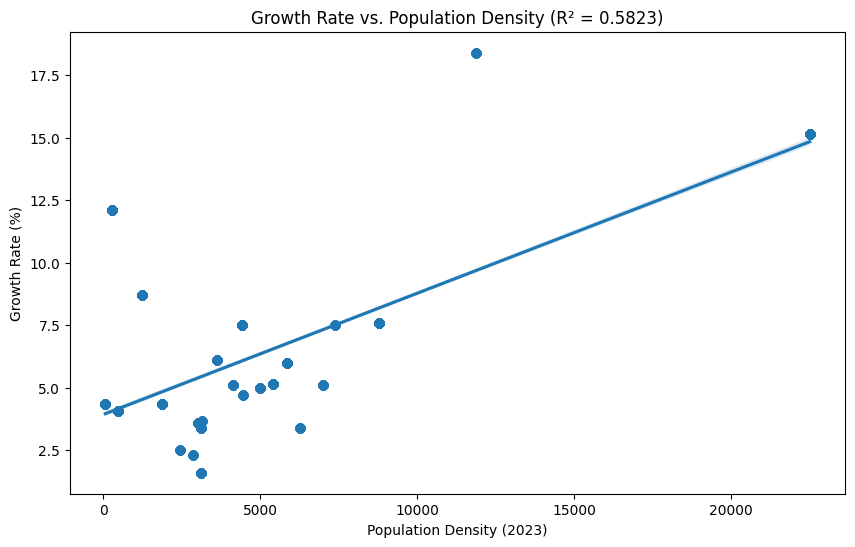


Correlation Matrix:
                                  2024_growth_rate  IEO_Score  IER_Score  \
2024_growth_rate                          1.000000   0.107619  -0.806300   
IEO_Score                                 0.107619   1.000000  -0.486640   
IER_Score                                -0.806300  -0.486640   1.000000   
population_density_2023                   0.763107   0.381360  -0.863381   
min_distance_to_university               -0.038317  -0.585461   0.298414   
min_distance_to_shopping_mall            -0.072361  -0.824946   0.453865   
min_distance_to_secondary_school         -0.076963  -0.561249   0.320599   
min_distance_to_primary_school           -0.042944  -0.454321   0.242759   
min_distance_to_park                      0.006172  -0.352711   0.148311   

                                  population_density_2023  \
2024_growth_rate                                 0.763107   
IEO_Score                                        0.381360   
IER_Score                          

In [5]:

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 2. Correlation analysis
correlation_columns = ['2024_growth_rate', 'IEO_Score', 'IER_Score', 'population_density_2023', 
                    'min_distance_to_university', 
                       'min_distance_to_shopping_mall', 'min_distance_to_secondary_school', 
                       'min_distance_to_primary_school', 'min_distance_to_park']

correlation_matrix = df[correlation_columns].corr()

# 3. Growth rate distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['2024_growth_rate'], kde=True)
plt.title('Distribution of Growth Rates')
plt.xlabel('Growth Rate (%)')
plt.ylabel('Frequency')
plt.show()

# 4. Scatter plot: Growth Rate vs. IEO Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IEO_Score', y='2024_growth_rate', data=df)
plt.title('Growth Rate vs. IEO Score')
plt.xlabel('IEO Score')
plt.ylabel('Growth Rate (%)')
plt.show()

# 5. Box plot: Growth Rate by IER State Decile
plt.figure(figsize=(12, 6))
sns.boxplot(x='IER_State Decile', y='2024_growth_rate', data=df)
plt.title('Growth Rate Distribution by IER State Decile')
plt.xlabel('IER State Decile')
plt.ylabel('Growth Rate (%)')
plt.show()

# 6. Regression analysis: Growth Rate vs. Population Density
slope, intercept, r_value, p_value, std_err = stats.linregress(df['population_density_2023'], df['2024_growth_rate'])

plt.figure(figsize=(10, 6))
sns.regplot(x='population_density_2023', y='2024_growth_rate', data=df, scatter_kws={'alpha':0.5})
plt.title(f'Growth Rate vs. Population Density (R² = {r_value**2:.4f})')
plt.xlabel('Population Density (2023)')
plt.ylabel('Growth Rate (%)')
plt.show()

print("\nCorrelation Matrix:")
print(correlation_matrix)

print(f"\nRegression Analysis - Growth Rate vs. Population Density:")
print(f"R-squared: {r_value**2:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")


In [6]:
df = df.drop(columns=['agentNames', 'brandName', 'addressStreet','addressSuburb', 'addressState','id'])

# 2025_growth_rate  2026_growth_rate

In [7]:
numeric_features = df.select_dtypes(exclude=['object']).columns.to_list()
numeric_features

['price',
 'hasVideo',
 'addressPostcode',
 'addressLat',
 'addressLng',
 'num_bath',
 'isRural',
 'landSize',
 'Retirement',
 'postcode',
 '2023_population',
 'ERP_2023_change_number',
 'natural_2023_increase_number',
 'internal_2023_migration_number',
 'overseas_2023_migration_number',
 'area_in_square_kilometers',
 'estimated_2024_population',
 'IEO_Score',
 'IEO_State Rank',
 'IEO_State Decile',
 'IEO_State Percentile',
 'IER_Usual Resident Population',
 'IER_Score',
 'IER_State Rank',
 'IER_State Decile',
 'IER_State Percentile',
 'ERP_2023_change_percentage(%)',
 'population_density_2023',
 'min_walking_distance_to_station',
 'min_distance_to_university',
 'min_distance_to_shopping_mall',
 'min_distance_to_secondary_school',
 'min_distance_to_primary_school',
 'min_distance_to_park',
 'medical_institution_count',
 '2023_growth_rate',
 '2024_growth_rate',
 '2025_growth_factor',
 'estimated_2025_population',
 '2025_growth_rate',
 '2026_growth_factor',
 'estimated_2026_population',


In [8]:
features = ['num_bath', 'IEO_Score', 'addressLat', 'addressLng',
       'area_in_square_kilometers', 'min_distance_to_park',
       'min_distance_to_primary_school',
       'min_distance_to_secondary_school', 'min_distance_to_university',
       '2024_growth_rate',
       ]

target = 'price'
df = df.dropna()
data_2024 = df[features+[target]]
data_2024 = data_2024.rename(columns={'2024_growth_rate' : 'growth_rate'})


In [18]:
# import the random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# instantiate model with 200 decision trees
rf = RandomForestRegressor(random_state=42)

gb = GradientBoostingRegressor(random_state=42)

In [10]:
train_features = ['num_bath', 'IEO_Score', 'addressLat', 'addressLng',
                  'area_in_square_kilometers', 'min_distance_to_park',
       'min_distance_to_primary_school',
       'min_distance_to_secondary_school', 'min_distance_to_university','growth_rate']
x_train = data_2024[train_features]
y_train = data_2024[target]


# split the data into two groups that are training set and the testing set
x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(x_train, y_train, 
                                                                            test_size=0.3, shuffle=True)

In [20]:

# train the model on training data
rf.fit(x_train_split, y_train_split)
rf_reg_r2 = r2_score(y_test_split, rf.predict(x_test_split))
rf_reg_mse = mean_squared_error(y_test_split, rf.predict(x_test_split)) 
print(rf_reg_r2,rf_reg_mse)# calculate the R suqared


0.5509959077910583 19231.99829166365


In [22]:
# train the model on training data
gb.fit(x_train_split, y_train_split)
gb_reg_r2 = r2_score(y_test_split, gb.predict(x_test_split))
gb_reg_mse = mean_squared_error(y_test_split, gb.predict(x_test_split)) 
print(gb_reg_r2,gb_reg_mse)# calculate the R suqared

0.49336003036802056 21700.690928038526


In [13]:
features = ['num_bath', 'IEO_Score', 'addressLat', 'addressLng',
            'area_in_square_kilometers', 'min_distance_to_park',
       'min_distance_to_primary_school',
       'min_distance_to_secondary_school', 'min_distance_to_university','2025_growth_rate',
       ]
data_2025 = df[features+[target]]
data_2025 = data_2025.rename(columns={'2025_growth_rate' : 'growth_rate'})

predict_features = ['num_bath', 'IEO_Score', 'addressLat', 'addressLng',
                    'area_in_square_kilometers','min_distance_to_park',
       'min_distance_to_primary_school',
       'min_distance_to_secondary_school',  'min_distance_to_university','growth_rate',
       ]
predict_2025 = data_2025[predict_features]


features = ['num_bath', 'IEO_Score', 'addressLat', 'addressLng',
            'area_in_square_kilometers', 'min_distance_to_park',
       'min_distance_to_primary_school',
       'min_distance_to_secondary_school', 'min_distance_to_university','2026_growth_rate',
       ]
data_2026 = df[features+[target]]
data_2026 = data_2026.rename(columns={'2026_growth_rate' : 'growth_rate'})
predict_2026 = data_2026[predict_features]




In [14]:
df['Pred_2024'] = rf.predict(x_train)
df['Pred_2025'] = rf.predict(predict_2025)
df['Pred_2026'] = rf.predict(predict_2026)


In [15]:
df

,promoType,price,hasVideo,addressPostcode,addressLat,addressLng,num_bath,type,formatted,isRural,...,2024_growth_rate,2025_growth_factor,estimated_2025_population,2025_growth_rate,2026_growth_factor,estimated_2026_population,2026_growth_rate,Pred_2024,Pred_2025,Pred_2026
0,premiumplus,500.0,False,3003,-37.810738,144.95226,1.0,ApartmentUnitFlat,Apartment / Unit / Flat,False,...,8.700138,1.207001,11445.994044,20.700138,1.077001,12327.35133,7.700138,515.27381,381.12381,516.27381
1,premiumplus,540.0,True,3003,-37.810135,144.95040,1.0,ApartmentUnitFlat,Apartment / Unit / Flat,False,...,8.700138,1.207001,11445.994044,20.700138,1.077001,12327.35133,7.700138,634.43000,412.96000,635.03000
2,standardpp,650.0,False,3003,-37.810757,144.95224,2.0,ApartmentUnitFlat,Apartment / Unit / Flat,False,...,8.700138,1.207001,11445.994044,20.700138,1.077001,12327.35133,7.700138,700.94000,688.85000,703.09000
3,premiumplus,560.0,False,3003,-37.810860,144.95183,1.0,ApartmentUnitFlat,Apartment / Unit / Flat,False,...,8.700138,1.207001,11445.994044,20.700138,1.077001,12327.35133,7.700138,537.27381,388.49381,536.67381
4,standardpp,600.0,False,3003,-37.807606,144.94562,1.0,ApartmentUnitFlat,Apartment / Unit / Flat,False,...,8.700138,1.207001,11445.994044,20.700138,1.077001,12327.35133,7.700138,611.95000,387.35000,614.49000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4268,standard,500.0,False,3024,-37.863820,144.58377,2.0,House,House,False,...,12.110877,1.241109,111787.908370,24.110877,1.111109,124208.52580,11.110877,499.35000,499.35000,499.35000
4269,standard,500.0,False,3024,-37.860850,144.59560,2.0,House,House,False,...,12.110877,1.241109,111787.908370,24.110877,1.111109,124208.52580,11.110877,492.70000,492.70000,492.70000
4270,elite,510.0,False,3024,-37.852295,144.59398,2.0,House,House,False,...,12.110877,1.241109,111787.908370,24.110877,1.111109,124208.52580,11.110877,510.50000,510.50000,510.50000
4271,elite,520.0,False,3024,-37.873215,144.60631,2.0,House,House,False,...,12.110877,1.241109,111787.908370,24.110877,1.111109,124208.52580,11.110877,508.90000,508.90000,508.90000


In [16]:

# Step 1: Calculate CAGR for each property
df['cagr'] = ((df['Pred_2026'] / df['Pred_2024']) ** (1/3)) - 1

# Step 2: Predict prices for 2027 and 2028 using CAGR
df['Pred_2027'] = df['Pred_2026'] * (1 + df['cagr'])
df['Pred_2028'] = df['Pred_2027'] * (1 + df['cagr'])

# Step 3: Calculate price increase rate from 2024 to 2028
df['increase_rate'] = ((df['Pred_2028'] - df['Pred_2024']) / df['Pred_2024']) * 100

# Step 4: Sort properties by increase rate to find the maximum
df_sorted = df.sort_values(by='increase_rate', ascending=False)
property_max_increase = df_sorted.iloc[0]


print(property_max_increase)


promoType                                                        standard
price                                                               300.0
hasVideo                                                            False
addressPostcode                                                      3101
addressLat                                                     -37.796482
addressLng                                                        145.031
num_bath                                                              2.0
type                                                                House
formatted                                                           House
isRural                                                             False
landSize                                                              0.0
Retirement                                                          False
postcode                                                             3101
2023_population                       

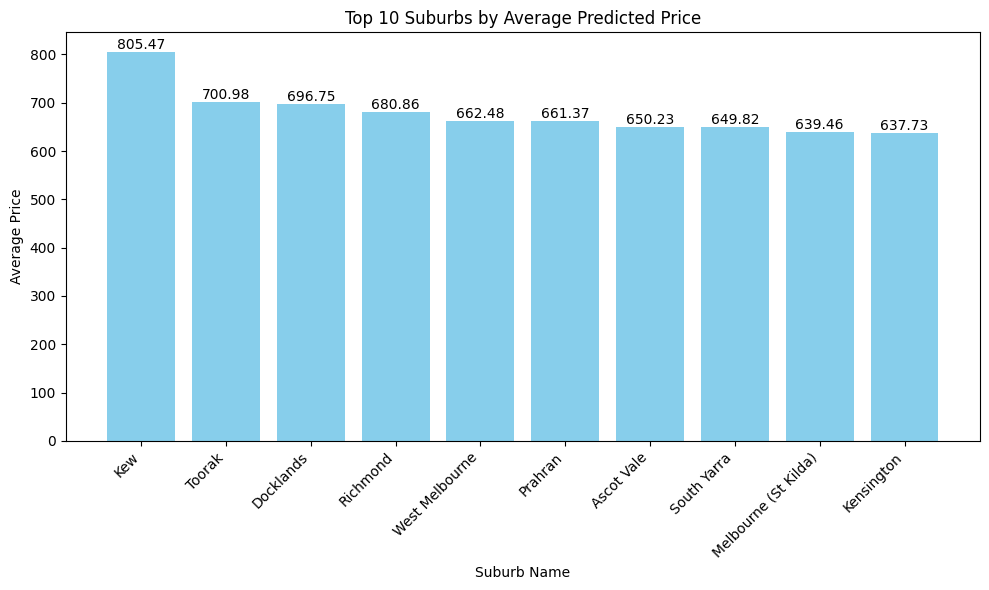

In [17]:
import pandas as pd 
import matplotlib.pyplot as plt

postcode_to_suburb = {
    3101: 'Kew',
    3142: 'Toorak',
    3008: 'Docklands',
    3121: 'Richmond',
    3003: 'West Melbourne',
    3181: 'Prahran',
    3013: 'Ascot Vale',
    3141: 'South Yarra',
    3004: 'Melbourne (St Kilda)',
    3031: 'Kensington'
}

top_10_avg_price = df.groupby('addressPostcode')['price'].mean().sort_values(ascending=False).head(10)
top_10_avg_price.index = top_10_avg_price.index.map(postcode_to_suburb)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_avg_price.index.astype(str), top_10_avg_price, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Top 10 Suburbs by Average Predicted Price')
plt.xlabel('Suburb Name') 
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('../plots/top10_suburbs_avg_price.png')

plt.show()
